In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


def load_image_and_split_channels(image_path):
    # Step 1: Load the image
    image = Image.open(image_path).convert('RGB')
    
    # Step 2: Convert the image into a NumPy array
    image_np = np.array(image)
    
    # Step 3: Extract the Red, Green, and Blue channels
    red_channel = image_np[:, :, 0]
    green_channel = image_np[:, :, 1]
    blue_channel = image_np[:, :, 2]
    
    return red_channel, green_channel, blue_channel

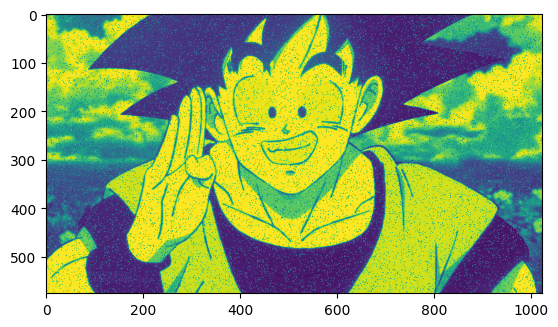

In [8]:
Y_1, Y_2, Y_3 = load_image_and_split_channels("son_goku.png")
m = len(Y_1)
n = len(Y_1[0])
plt.imshow(Y_1)

In [422]:
def reg2(X):
    m = len(Y_1)
    n = len(Y_1[0])
    R = np.zeros((m, n))
    
    R[2:m, 1: n - 1] = (X[2:m, 1: n-1] - X[1:m-1, 1 : n - 1]) ** 2 + (X[1:m-1, 2: n] - X[1:m-1, 1:n-1]) ** 2

    return R


def R(X):
    m = len(Y_1)
    n = len(Y_1[0])
    return np.sum((X[2:m, 1: n-1] - X[1:m-1, 1 : n - 1]) ** 2 + (X[1:m-1, 2: n] - X[1:m-1, 1:n-1]) ** 2)


def grad_R(X):
    m = len(Y_1)
    n = len(Y_1[0])
    R = np.zeros((m, n))


    # 4Xij - 2 * (X(i+1)j + Xi(j+1))
    R[1,1:n-1] = 4 * X[1, 1: n - 1] - 2 * (X[2,1 : n - 1] + X[1, 2:n])
    R[2:m-1, 1] = 4 * X[2:m-1, 1] - 2 * (X[3:m, 1] + X[2:m-1, 2])


    i = 2 # -> m- 1
    j = 2 # -> n - 1
    R[i:m-1, j:n-1] = 8 * X[i:m-1, j:n-1] - 2 * (X[i+1:m, j:n-1] + X[i-1:m-2, j:n-1] + X[i:m-1, j+1:n] + X[i:m-1, j-1:n-2])

    i = m - 1
    R[i, 1:n-1] = 2 * (X[i, 1:n - 1] - X[i - 1, 1:n-1])

    j = n - 1
    R[1:m-1, j] = 2 * (X[1:m-1, j] - X[1:m-1, j - 1])

    return R


def grad_R2(X):
    m = len(X)
    n = len(X[0])
    R = np.zeros((m, n))


    R[1:m-1, 1:n-1] = 4 * X[1:m-1, 1:n-1] - 2 * (X[2:m, 1:n-1] + X[1:m-1, 2:n])
    # R[m-1, 1:n-1] = 2 * (X[m - 1, 1:n-1]- X[m-2, 1:n-1])
    # R[1:m-1, n-1] = 2 * (X[1:m - 1, n-2]- X[1:m-1, n-1])


    return R



grad_f = lambda X, Y, lambda_ :  X - Y + lambda_* grad_R(X)


# def grad_f(X, Y, lambda_):
#     gX, gY = np.gradient(X)
#     gXX, gXY = np.gradient(gX)

#     return X - Y

In [484]:
def projected_GM(Y, L, lambda_, eps = 10**-5):

    # X = np.zeros_like(Y)
    # X = 255 * np.random.rand(len(Y), len(Y[0]))
    X = Y
    X_prev = X
    
    Z = X - (1/L) * grad_f(X, Y, lambda_)   
    X = np.clip(Z, 0, 255)

    COST = L * np.linalg.norm(X - X_prev, 'fro')
    i = 1
    print("cost:", COST, "iter ", i)



    j = 0

    while COST > eps:


        X_prev = X
        Z = X - (1/L) * grad_f(X, Y, lambda_) 
        X = np.clip(Z, 0, 255)  

        COST =L *  np.linalg.norm(X - X_prev, 'fro')

        i += 1

        if j > 200:
            print("cost:", COST, "iter ", i)
            j = 0

        j += 1

    print("cost:", COST, "iter ", i)
    
    return X


def PGM_net(X_0, Y, L, lambda_, eps = 10**-5):

    # X = np.zeros_like(Y)
    X = 255 * np.random.rand(len(Y), len(Y[0]))
    X_prev = X
    
    Z = X - (1/L) * grad_f(X, Y, lambda_)   
    X = np.clip(Z, 0, 255)

    COST = L * np.linalg.norm(X - X_prev, 'fro')
    i = 1
    print("cost:", COST, "iter ", i)



    j = 0

    while COST > eps:


        X_prev = X
        Z = X - (1/L) * grad_f(X, Y, lambda_) 
        X = np.clip(Z, 0, 255)  

        COST =L *  np.linalg.norm(X - X_prev, 'fro')

        i += 1

        if j > 200:
            print("cost:", COST, "iter ", i)
            j = 0

        j += 1

    print("cost:", COST, "iter ", i)
    
    return X


In [489]:
lambda_ = 1
L = 8 * lambda_ + 1

X1 = projected_GM(Y_1, L, lambda_)
X2 = projected_GM(Y_2, L, lambda_)
X3 = projected_GM(Y_3, L, lambda_)

cost: 105196.642009144 iter  1
cost: 9.05092878901524e-06 iter  182
cost: 109382.12751633604 iter  1
cost: 9.055633861749498e-06 iter  182
cost: 107691.97694814594 iter  1
cost: 9.086407797672115e-06 iter  182


In [491]:
lambda_ = 8
L = 8 * lambda_ + 1


X1_ = PGM_net(X1, Y_1, L, lambda_)
X2_ = PGM_net(X2, Y_2, L, lambda_)
X3_ = PGM_net(X3, Y_3, L, lambda_)

cost: 4079931.422411068 iter  1
cost: 9470.307089902999 iter  203
cost: 314.02836998728185 iter  404


KeyboardInterrupt: 

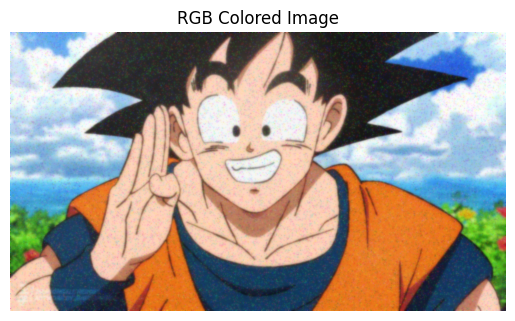

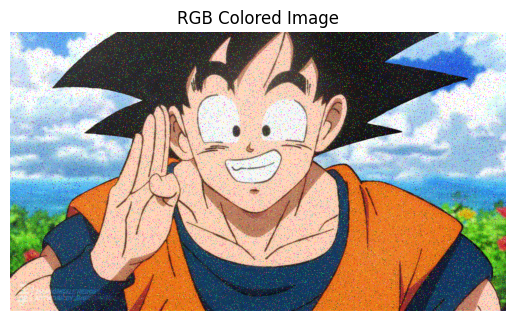

In [490]:
# colored_image = np.stack((Y_1, Y_2, Y_3), axis=-1)


X1 = np.round(X1)
X2 = np.round(X2)
X3 = np.round(X3)

X1 = X1.astype(int)
X2 = X2.astype(int)
X3 = X3.astype(int)

colored_image = np.stack((X1, X2, X3), axis=-1)
og_image = np.stack((Y_1, Y_2, Y_3), axis=-1)

# Display the image using matplotlib
plt.imshow(colored_image, cmap='viridis')
plt.title("RGB Colored Image")
plt.axis('off')  # Hide axes
plt.show()


colored_image = np.stack((Y_1, Y_2, Y_3), axis=-1)
# colored_image = np.stack((X1, X2, X3), axis=-1)

# Display the image using matplotlib
plt.imshow(colored_image)
plt.title("RGB Colored Image")
plt.axis('off')  # Hide axes
plt.show()

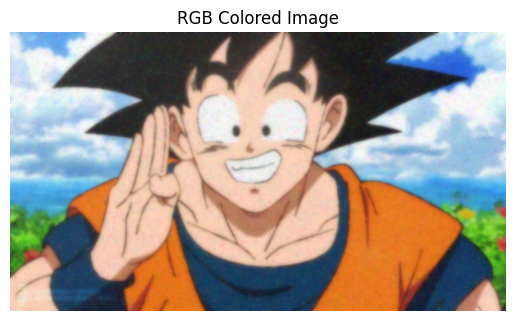

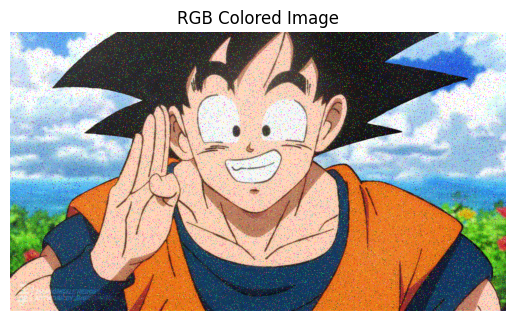

In [488]:
# colored_image = np.stack((Y_1, Y_2, Y_3), axis=-1)

X1_ = X1_.astype(int)
X2_ = X2_.astype(int)
X3_ = X3_.astype(int)

colored_image = np.stack((X1_, X2_, X3_), axis=-1)
og_image = np.stack((Y_1, Y_2, Y_3), axis=-1)

# Display the image using matplotlib
plt.imshow(colored_image, cmap='viridis')
plt.title("RGB Colored Image")
plt.axis('off')  # Hide axes
plt.savefig("filtered.png")
plt.show()

colored_image = np.stack((Y_1, Y_2, Y_3), axis=-1)
# colored_image = np.stack((X1, X2, X3), axis=-1)

# Display the image using matplotlib
plt.imshow(colored_image)
plt.title("RGB Colored Image")
plt.axis('off')  # Hide axes
plt.show()